In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import datetime as dt

In [ ]:

colspecs1 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(39,41),(41,42),(42,43),(43,44),(56,62),(62,68),(68,71),(126,129),(129,139)]
dfHH1 = pd.read_fwf('TUS106_L01.txt', colspecs1)
columns1 = ["FSU", "Sector","State","District","Stratum","Sub-stratum","Sample HHID","InformantSI no","Response code", "Survey code","Casualty code","Date of Survey","Date of despatch", "Time to canvass","NSC", "Multiplier"]
dfHH1.columns =  columns1


colspecs2 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(36,39),(39,40),(40,41),(41,44),(44,45),(45,47),(47,49),(49,51),(126,129),(129,139)]
dfTUS2 = pd.read_fwf('TUS106_L02.txt', colspecs2)
columns2 = ["FSU", "Sector","State","District","Stratum","Sub-stratum","Sample HHID","PersonID","RelationToHead","Gender","Age","MaritalStatus","Education", "PrincipleActivity","Industry of work","NSC", "Multiplier"]
dfTUS2.columns =  columns2


colspecs3 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(39,42),(44,46),(46,56),(56,66),(66,76),(76,86),(86,96),(96,98),(98,99),(99,100),(100,101),(101,102),(102,103),(126,129),(129,139)]
dfHH3 = pd.read_fwf('TUS106_L03.txt', colspecs3)
columns3 = ["FSU", "Sector","State","District","Stratum", "Sub-stratum", "Sample HHID", "HH Size", "Land Own", "Monthly HH expenses A", "Impute Home grown B", "Wages in Kind C", "HH durable spent D", "Overall monthly expenses", "Cooking energy", "lighting energy", "Washing clothes", "Sweeping floor", "Dwelling structure", "Care giver", "NSC", "Multiplier"]
dfHH3.columns =  columns3

colspecs4 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(36,39),(44,45),(45,46),(46,47),(126,129),(129,139)]
dfTUS4 = pd.read_fwf('TUS106_L04.txt', colspecs4)
columns4 = ["FSU", "Sector","State","District","Stratum", "Sub-stratum", "Sample HHID", "PersonID", "Day of the week", "Type of the day","Response code","NSC", "Multiplier"]
dfTUS4.columns =  columns4

colspecs5 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(36,39),(42,45),(45,50),(50,55),(55,56),(56,57),(57,58), (58,59), (58,60), (58,61),(61,62),(62,64),(64,65),(126,129),(129,139)]
dfTUS5 = pd.read_fwf('TUS106_L05.txt', colspecs5)                                                                                                               
columns5 = ["FSU", "Sector","State","District","Stratum","Sub-stratum","Sample HHID","PersonID","Serial no of activity", "Time from","Time to","MultiActivity","SimulActivity", "MajorActivity","Activity category", "Activity group","Activity code", "Where","Paid-unpaid","Type of enterprise","NSC", "Multiplier"]
dfTUS5.columns =  columns5


In [ ]:
#State codes 
# Kashmir = 1
# HimachalPradesh = 2
# Punjab = 3
# Chandigar = 4
# Uttarakhand = 5
# Haryana = 6
# Delhi = 7
# Rajasthan = 8
# UttarPradesh = 9
# Bihar = 10
# Sikkim = 11
# ArunachalPradesh = 12
# Nagaland = 13
# Manipur = 14
# Mizoram = 15
# Tripura = 16
# Meghalaya = 17
# Assam = 18
# WestBengal = 19
# Jharkhand = 20
# Odisha = 21
# Chhatishgarh = 22
# MadhyaPradesh = 23
# Gujarat = 24
# DamanDiu = 25
# DNHaveli = 26
# Maharashtra = 27
# AndhraPradesh = 28
# Karnataka = 29
# Goa = 30
# Lakshadweep = 31
# Kerala = 32
# Tamilnadu = 33
# Puducherry = 34
# ANIslands = 35
# Telangana = 36

#All india data - rural sector only

df_INR_HH1 = dfHH1[(dfHH1.Sector == 2)]
df_INR_TUS2 = dfTUS2[(dfTUS2.Sector == 2)]
df_INR_HH3 = dfHH3[(dfHH3.Sector == 2)]
df_INR_TUS4 = dfTUS4[(dfTUS4.Sector == 2)]
df_INR_TUS5 = dfTUS5[(dfTUS5.Sector == 2)] 

#Maharshstra state rural households

df_MHR_HH1 = dfHH1[(dfHH1.Sector == 2) & (dfHH1.State == 27)]
df_MHR_TUS2 = dfTUS2[(dfTUS2.Sector == 2) & (dfTUS2.State == 27)]
df_MHR_HH3 = dfHH3[(dfHH3.Sector == 2) & (dfHH3.State == 27)]
df_MHR_TUS4 = dfTUS4[(dfTUS4.Sector == 2) & (dfTUS4.State == 27)]
df_MHR_TUS5 = dfTUS5[(dfTUS5.Sector == 2) & (dfTUS5.State == 27)]

#UttarPradesh state rural households
## NOTE: Uttar Pradesh data has a mistake Urban is Sector 2 and Rural is sector 1 based on information given on Sampling TUS document

df_UPR_HH1 = dfHH1[(dfHH1.Sector == 1) & (dfHH1.State == 9)]
df_UPR_TUS2 = dfTUS2[(dfTUS2.Sector == 1) & (dfTUS2.State == 9)]
df_UPR_HH3 = dfHH3[(dfHH3.Sector == 1) & (dfHH3.State == 9)]
df_UPR_TUS4 = dfTUS4[(dfTUS4.Sector == 1) & (dfTUS4.State == 9)]
df_UPR_TUS5 = dfTUS5[(dfTUS5.Sector == 1) & (dfTUS5.State == 9)]

#Nagaland State rural households
# Urban rural sector code swap

df_NGR_HH1 = dfHH1[(dfHH1.Sector == 1) & (dfHH1.State == 13)]
df_NGR_TUS2 = dfTUS2[(dfTUS2.Sector == 1) & (dfTUS2.State == 13)]
df_NGR_HH3 = dfHH3[(dfHH3.Sector == 1) & (dfHH3.State == 13)]
df_NGR_TUS4 = dfTUS4[(dfTUS4.Sector == 1) & (dfTUS4.State == 13)]
df_NGR_TUS5 = dfTUS5[(dfTUS5.Sector == 1) & (dfTUS5.State == 13)]

#Tamilnadu state rural households

df_TNR_HH1 = dfHH1[(dfHH1.Sector == 2) & (dfHH1.State == 33)]
df_TNR_TUS2 = dfTUS2[(dfTUS2.Sector == 2) & (dfTUS2.State == 33)]
df_TNR_HH3 = dfHH3[(dfHH3.Sector == 2) & (dfHH3.State == 33)]
df_TNR_TUS4 = dfTUS4[(dfTUS4.Sector == 2) & (dfTUS4.State == 33)]
df_TNR_TUS5 = dfTUS5[(dfTUS5.Sector == 2) & (dfTUS5.State == 33)]

df_INR_HH1.to_csv('INR_HH1.csv')
df_INR_TUS2.to_csv('INR_TUS2.csv')
df_INR_HH3.to_csv('INR_HH3.csv')
df_INR_TUS4.to_csv('INR_TUS4.csv')
df_INR_TUS5.to_csv('INR_TUS5.csv')

df_MHR_HH1.to_csv('MHR_HH1.csv')
df_MHR_TUS2.to_csv('MHR_TUS2.csv')
df_MHR_HH3.to_csv('MHR_HH3.csv')
df_MHR_TUS4.to_csv('MHR_TUS4.csv')
df_MHR_TUS5.to_csv('MHR_TUS5.csv')

df_UPR_HH1.to_csv('UPR_HH1.csv')
df_UPR_TUS2.to_csv('UPR_TUS2.csv')
df_UPR_HH3.to_csv('UPR_HH3.csv')
df_UPR_TUS4.to_csv('UPR_TUS4.csv')
df_UPR_TUS5.to_csv('UPR_TUS5.csv')

df_NGR_HH1.to_csv('NGR_HH1.csv')
df_NGR_TUS2.to_csv('NGR_TUS2.csv')
df_NGR_HH3.to_csv('NGR_HH3.csv')
df_NGR_TUS4.to_csv('NGR_TUS4.csv')
df_NGR_TUS5.to_csv('NGR_TUS5.csv')

df_TNR_HH1.to_csv('TNR_HH1.csv')
df_TNR_TUS2.to_csv('TNR_TUS2.csv')
df_TNR_HH3.to_csv('TNR_HH3.csv')
df_TNR_TUS4.to_csv('TNR_TUS4.csv')
df_TNR_TUS5.to_csv('TNR_TUS5.csv')

In [2]:
df_INR_HH1 = pd.read_csv('INR_HH1.csv')
df_INR_TUS2 = pd.read_csv('INR_TUS2.csv')
df_INR_HH3 = pd.read_csv('INR_HH3.csv')
df_INR_TUS4 = pd.read_csv('INR_TUS4.csv')
df_INR_TUS5 = pd.read_csv('INR_TUS5.csv')


df_MHR_HH1 = pd.read_csv('MHR_HH1.csv')
df_MHR_TUS2 = pd.read_csv('MHR_TUS2.csv')
df_MHR_HH3 = pd.read_csv('MHR_HH3.csv')
df_MHR_TUS4 = pd.read_csv('MHR_TUS4.csv')
df_MHR_TUS5 = pd.read_csv('MHR_TUS5.csv')

df_UPR_HH1 = pd.read_csv('UPR_HH1.csv')
df_UPR_TUS2 = pd.read_csv('UPR_TUS2.csv')
df_UPR_HH3 = pd.read_csv('UPR_HH3.csv')
df_UPR_TUS4 = pd.read_csv('UPR_TUS4.csv')
df_UPR_TUS5 = pd.read_csv('UPR_TUS5.csv')

df_NGR_HH1 = pd.read_csv('NGR_HH1.csv')
df_NGR_TUS2 = pd.read_csv('NGR_TUS2.csv')
df_NGR_HH3 = pd.read_csv('NGR_HH3.csv')
df_NGR_TUS4 = pd.read_csv('NGR_TUS4.csv')
df_NGR_TUS5 = pd.read_csv('NGR_TUS5.csv')

df_TNR_HH1 = pd.read_csv('TNR_HH1.csv')
df_TNR_TUS2 = pd.read_csv('TNR_TUS2.csv')
df_TNR_HH3 = pd.read_csv('TNR_HH3.csv')
df_TNR_TUS4 = pd.read_csv('TNR_TUS4.csv')
df_TNR_TUS5 = pd.read_csv('TNR_TUS5.csv')

In [ ]:
# confirming total number of FSUs sampled are from rural sector in each state - verify with Sampling TUS document

print(df_MHR_HH1['FSU'].nunique()) # Should be around 448
print(df_UPR_HH1['FSU'].nunique()) # Should be around 800
print(df_NGR_HH1['FSU'].nunique()) # Should be around 48
print(df_TNR_HH1['FSU'].nunique()) # Should be around 300



In [ ]:
# Number of households surveyed in each state rural sector

print(df_MHR_HH1.shape[0])
print(df_UPR_HH1.shape[0])
print(df_NGR_HH1.shape[0])
print(df_TNR_HH1.shape[0])

print(df_MHR_HH3.shape[0])
print(df_UPR_HH3.shape[0])
print(df_NGR_HH3.shape[0])
print(df_TNR_HH3.shape[0])



In [ ]:
df_MHR_HH3.plot(x = 'HH Size', y = 'Overall monthly expenses',kind='scatter')
plt.savefig('Before outliers UP.png',dpi=300)
df_no_outliers.plot(x = 'HH Size', y = 'Overall monthly expenses',kind='scatter')
plt.savefig('Outlier treatment UP.png',dpi=300)

In [ ]:
q1 = df_MHR_HH3['Overall monthly expenses'].quantile(0.25)
q3 = df_MHR_HH3['Overall monthly expenses'].quantile(0.75)
iqr = q3 - q1

# define the outlier cutoff values (Q1 - 1.5*IQR and Q3 + 1.5*IQR)
cutoff_low = q1 - 1.5*iqr
cutoff_high = q3 + 1.5*iqr

# filter out the outliers and create a new dataframe without them
df_no_outliers = df_MHR_HH3[(df_MHR_HH3['Overall monthly expenses'] >= cutoff_low) & (df_MHR_HH3['Overall monthly expenses'] <= cutoff_high)]

# create a figure with two subplots for boxplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# plot the original dataframe on the left subplot
axs[0].boxplot(df_MHR_HH3['Overall monthly expenses'], vert=False)
axs[0].set_title('Overall monthly expenses before IQR')

# plot the dataframe without outliers on the right subplot
axs[1].boxplot(df_no_outliers['Overall monthly expenses'], vert=False)
axs[1].set_title('Overall monthly expenses after IQR')

# set the x axis limit for the left subplot to include the outliers
axs[0].set_xlim(left=df_MHR_HH3['Overall monthly expenses'].min()-1, right=df_MHR_HH3['Overall monthly expenses'].max()+1)

# add space between the subplots and align the y axis labels
fig.subplots_adjust(wspace=0.2)
fig.align_ylabels()

# show the plot
plt.show()

from scipy.stats.mstats import winsorize

# define the lower and upper limits for winsorization
lower_limit = 0.01
upper_limit = 0.01

# apply winsorization to the 'HH Size' column and create a new column with winsorized values
df_MHR_HH3['Overall monthly expenses Winsorized'] = winsorize(df_MHR_HH3['Overall monthly expenses'], limits=(lower_limit, upper_limit))

# create a figure with two subplots for boxplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# plot the original dataframe on the left subplot
axs[0].boxplot(df_MHR_HH3['Overall monthly expenses'], vert=False)
axs[0].set_title('Overall monthly expenses before Winsorization')

# plot the dataframe with winsorized values on the right subplot
axs[1].boxplot(df_MHR_HH3['Overall monthly expenses Winsorized'], vert=False)
axs[1].set_title('Overall monthly expenses after Winsorization')

# set the x axis limit for the left subplot to include the outliers
axs[0].set_xlim(left=df_MHR_HH3['Overall monthly expenses'].min()-1, right=df_MHR_HH3['Overall monthly expenses'].max()+1)

# add space between the subplots and align the y axis labels
fig.subplots_adjust(wspace=0.2)
fig.align_ylabels()

# show the plot
plt.show()


In [ ]:

q1 = df_UPR_HH3['Overall monthly expenses'].quantile(0.25)
q3 = df_UPR_HH3['Overall monthly expenses'].quantile(0.75)
iqr = q3 - q1

cutoff_low = q1 - 1.5*iqr
cutoff_high = q3 + 1.5*iqr

df_no_outliers = df_UPR_HH3[(df_UPR_HH3['Overall monthly expenses'] >= cutoff_low) & (df_UPR_HH3['Overall monthly expenses'] <= cutoff_high)]

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

axs[0].boxplot(df_UPR_HH3['Overall monthly expenses'], vert=False)
axs[0].set_title('Overall monthly expenses before IQR')

axs[1].boxplot(df_no_outliers['Overall monthly expenses'], vert=False)
axs[1].set_title('Overall monthly expenses after IQR')

axs[0].set_xlim(left=df_UPR_HH3['Overall monthly expenses'].min()-1, right=df_UPR_HH3['Overall monthly expenses'].max()+1)

fig.subplots_adjust(wspace=0.2)
fig.align_ylabels()

plt.show()

from scipy.stats.mstats import winsorize

lower_limit = 0.01
upper_limit = 0.01

df_UPR_HH3['Overall monthly expenses Winsorized'] = winsorize(df_UPR_HH3['Overall monthly expenses'], limits=(lower_limit, upper_limit))

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

axs[0].boxplot(df_UPR_HH3['Overall monthly expenses'], vert=False)
axs[0].set_title('Overall monthly expenses before Winsorization')

axs[1].boxplot(df_UPR_HH3['Overall monthly expenses Winsorized'], vert=False)
axs[1].set_title('Overall monthly expenses after Winsorization')

axs[0].set_xlim(left=df_UPR_HH3['Overall monthly expenses'].min()-1, right=df_UPR_HH3['Overall monthly expenses'].max()+1)

fig.subplots_adjust(wspace=0.2)
fig.align_ylabels()

plt.show()

In [ ]:
qcolumns = ['HH Size', 'Monthly HH expenses A', 'Impute Home grown B', 'Wages in Kind C',
       'HH durable spent D', 'Overall monthly expenses']
# create a figure with two subplots for boxplots
fig, axs = plt.subplots(ncols=2,nrows= np.shape(qcolumns)[0], figsize=(12, 22))

df_MHR_HH3_no_nan = df_MHR_HH3;
for i in range(np.shape(qcolumns)[0]):
    df_MHR_HH3_no_nan = df_MHR_HH3_no_nan[df_MHR_HH3_no_nan[qcolumns[i]].notna()];
    
df_no_outliers_full = df_MHR_HH3_no_nan

for i in range(np.shape(qcolumns)[0]):
    df_temp = df_MHR_HH3_no_nan;
    # calculate the first and third quartiles and the interquartile range
    q1 = df_temp[qcolumns[i]].quantile(0.25)
    q3 = df_temp[qcolumns[i]].quantile(0.75)
    iqr = q3 - q1

    # define the outlier cutoff values (Q1 - 1.5*IQR and Q3 + 1.5*IQR)
    cutoff_low = q1 - 1.5*iqr
    cutoff_high = q3 + 1.5*iqr
   
    # filter out the outliers and create a new dataframe without them
    df_no_outliers = df_temp[(df_temp[qcolumns[i]] >= cutoff_low) & (df_temp[qcolumns[i]] <= cutoff_high)]
    df_no_outliers_full = df_no_outliers_full[(df_no_outliers_full[qcolumns[i]] >= cutoff_low) & (df_no_outliers_full[qcolumns[i]] <= cutoff_high)]
    # plot the original dataframe on the left subplot
    axs[i,0].boxplot(df_temp[qcolumns[i]], vert=False)
    axs[i,0].set_title('Before removing outliers')

    # plot the dataframe without outliers on the right subplot
    axs[i,1].boxplot(df_no_outliers[qcolumns[i]], vert=False)
    axs[i,1].set_title('After removing outliers')

    # set the x axis limit for the left subplot to include the outliers
    #axs[i,0].set_xlim(left=df_MHR_HH3[qcolumns[i]].min()-1, right=df_MHR_HH3[qcolumns[i]].max()+1)

# add space between the subplots and align the y axis labels
fig.subplots_adjust(wspace=0.2)
fig.align_ylabels()

# show the plot
plt.show()

In [ ]:
# m

q1 = df_UPR_HH3['HH Size'].quantile(0.25)
q3 = df_UPR_HH3['HH Size'].quantile(0.75)
iqr = q3 - q1

# define the outlier cutoff values (Q1 - 1.5*IQR and Q3 + 1.5*IQR)
cutoff_low = q1 - 1.5*iqr
cutoff_high = q3 + 1.5*iqr

# filter out the outliers and create a new dataframe without them
df_IQR_UP = df_UPR_HH3[(df_UPR_HH3['HH Size'] >= cutoff_low) & (df_UPR_HH3['HH Size'] <= cutoff_high)]

q1 = df_NGR_HH3['HH Size'].quantile(0.25)
q3 = df_NGR_HH3['HH Size'].quantile(0.75)
iqr = q3 - q1

# define the outlier cutoff values (Q1 - 1.5*IQR and Q3 + 1.5*IQR)
cutoff_low = q1 - 1.5*iqr
cutoff_high = q3 + 1.5*iqr

# filter out the outliers and create a new dataframe without them
df_IQR_NG = df_NGR_HH3[(df_NGR_HH3['HH Size'] >= cutoff_low) & (df_NGR_HH3['HH Size'] <= cutoff_high)]

q1 = df_TNR_HH3['HH Size'].quantile(0.25)
q3 = df_TNR_HH3['HH Size'].quantile(0.75)
iqr = q3 - q1

# define the outlier cutoff values (Q1 - 1.5*IQR and Q3 + 1.5*IQR)
cutoff_low = q1 - 1.5*iqr
cutoff_high = q3 + 1.5*iqr

# filter out the outliers and create a new dataframe without them
df_IQR_TN = df_TNR_HH3[(df_TNR_HH3['HH Size'] >= cutoff_low) & (df_TNR_HH3['HH Size'] <= cutoff_high)]

In [4]:

from scipy.stats.mstats import winsorize

lower_limit = 0.01
upper_limit = 0.01


df_MHR_HH3['HH Size Winsorized'] = winsorize(df_MHR_HH3['HH Size'], limits=(lower_limit, upper_limit))
df_UPR_HH3['HH Size Winsorized'] = winsorize(df_UPR_HH3['HH Size'], limits=(lower_limit, upper_limit))
df_NGR_HH3['HH Size Winsorized'] = winsorize(df_NGR_HH3['HH Size'], limits=(lower_limit, upper_limit))
df_TNR_HH3['HH Size Winsorized'] = winsorize(df_TNR_HH3['HH Size'], limits=(lower_limit, upper_limit))

In [5]:
df_MH = pd.DataFrame({'State': 'MH'}, df_MHR_HH3['HH Size'])
df_UP = pd.DataFrame({'State': 'UP'}, df_UPR_HH3['HH Size'])
df_NG = pd.DataFrame({'State': 'NG'}, df_NGR_HH3['HH Size'])
df_TN = pd.DataFrame({'State': 'TN'}, df_TNR_HH3['HH Size'])

df_MH_IQR = pd.DataFrame({'State': 'MH'}, df_IQR_MH['HH Size'])
df_UP_IQR = pd.DataFrame({'State': 'UP'}, df_IQR_UP['HH Size'])
df_NG_IQR = pd.DataFrame({'State': 'NG'}, df_IQR_NG['HH Size'])
df_TN_IQR = pd.DataFrame({'State': 'TN'}, df_IQR_TN['HH Size'])

df_MH_wins = pd.DataFrame({'State': 'MH'}, df_MHR_HH3['HH Size Winsorized'])
df_UP_wins = pd.DataFrame({'State': 'UP'}, df_UPR_HH3['HH Size Winsorized'])
df_NG_wins = pd.DataFrame({'State': 'NG'}, df_NGR_HH3['HH Size Winsorized'])
df_TN_wins = pd.DataFrame({'State': 'TN'}, df_TNR_HH3['HH Size Winsorized'])


In [6]:
# Concatenate the selected columns from the four dataframes
Original = pd.concat([df_MH, df_UP, df_NG, df_TN], ignore_index=False)
IQR = pd.concat([df_MH_IQR, df_UP_IQR, df_NG_IQR, df_TN_IQR], ignore_index=False)
Winsorization = pd.concat([df_MH_wins, df_UP_wins, df_NG_wins, df_TN_wins], ignore_index=False)

In [7]:
Original['index_range'] = range(len(Original))
IQR['index_range'] = range(len(IQR))
Winsorization['index_range'] = range(len(Winsorization))

In [8]:
Original.reset_index(inplace=True)
Original.set_index('index_range', inplace=True, drop=False)

IQR.reset_index(inplace=True)
IQR.set_index('index_range', inplace=True, drop=False)

Winsorization.reset_index(inplace=True)
Winsorization.set_index('index_range', inplace=True, drop=False)

In [9]:
Winsorization = Winsorization.rename(columns={'HH Size Winsorized':'HH Size'})

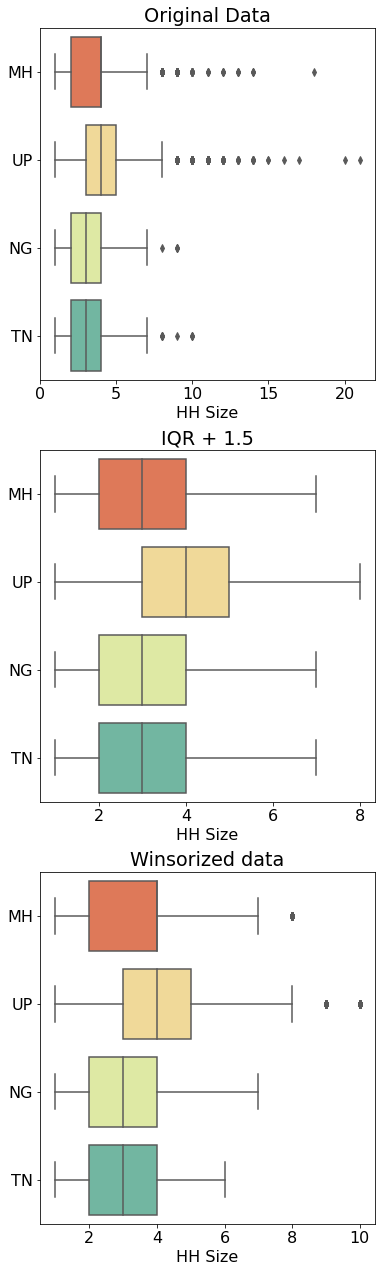

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have 3 data frames: df1, df2, df3
import matplotlib as mpl

# Set the default font size
mpl.rcParams['font.size'] = 16

data_frames = [Original, IQR, Winsorization]

Original.name = 'Original Data'
IQR.name = 'IQR + 1.5'
Winsorization.name = 'Winsorized data'

# Create a 1x3 subplot
fig, axes = plt.subplots(3, 1, figsize=(6, 22), sharey=True)

# Define the states corresponding to each data frame (if applicable)
#states = ['State1', 'State2', 'State3']

# Create three separate box plots using the 1x3 subplot
for i, df in enumerate(data_frames):
    sns.boxplot(
        data=df,
        x="HH Size", y='State',
        orient="h", palette='Spectral', ax=axes[i]
    )
    axes[i].set(xlabel="HH Size", ylabel="")
    axes[i].set_title(f"{df.name}")
    axes[i].xaxis.set_major_formatter('{x:.0f}')
    
    # Set the font size of the x-axis label and tick labels
    axes[i].xaxis.label.set_fontsize(16)
    axes[i].tick_params(axis='x', labelsize=16)

plt.savefig('outliers treated HH Size data.png', dpi=300)
plt.show()

In [12]:
df_MHR_HH3['Overall monthly expenses']= df_MHR_HH3['Overall monthly expenses']/81.81
df_UPR_HH3['Overall monthly expenses']= df_UPR_HH3['Overall monthly expenses']/81.81
df_NGR_HH3['Overall monthly expenses']= df_NGR_HH3['Overall monthly expenses']/81.81
df_TNR_HH3['Overall monthly expenses']= df_TNR_HH3['Overall monthly expenses']/81.81



q1 = df_MHR_HH3['Overall monthly expenses'].quantile(0.25)
q3 = df_MHR_HH3['Overall monthly expenses'].quantile(0.75)
iqr = q3 - q1

cutoff_low = q1 - 1.5*iqr
cutoff_high = q3 + 1.5*iqr

df_IQR_MH_exp = df_MHR_HH3[(df_MHR_HH3['Overall monthly expenses'] >= cutoff_low) & (df_MHR_HH3['Overall monthly expenses'] <= cutoff_high)]

q1 = df_UPR_HH3['Overall monthly expenses'].quantile(0.25)
q3 = df_UPR_HH3['Overall monthly expenses'].quantile(0.75)
iqr = q3 - q1

cutoff_low = q1 - 1.5*iqr
cutoff_high = q3 + 1.5*iqr

df_IQR_UP_exp = df_UPR_HH3[(df_UPR_HH3['Overall monthly expenses'] >= cutoff_low) & (df_UPR_HH3['Overall monthly expenses'] <= cutoff_high)]

q1 = df_NGR_HH3['Overall monthly expenses'].quantile(0.25)
q3 = df_NGR_HH3['Overall monthly expenses'].quantile(0.75)
iqr = q3 - q1

cutoff_low = q1 - 1.5*iqr
cutoff_high = q3 + 1.5*iqr

df_IQR_NG_exp = df_NGR_HH3[(df_NGR_HH3['Overall monthly expenses'] >= cutoff_low) & (df_NGR_HH3['Overall monthly expenses'] <= cutoff_high)]

q1 = df_TNR_HH3['Overall monthly expenses'].quantile(0.25)
q3 = df_TNR_HH3['Overall monthly expenses'].quantile(0.75)
iqr = q3 - q1

cutoff_low = q1 - 1.5*iqr
cutoff_high = q3 + 1.5*iqr

df_IQR_TN_exp = df_TNR_HH3[(df_TNR_HH3['Overall monthly expenses'] >= cutoff_low) & (df_TNR_HH3['Overall monthly expenses'] <= cutoff_high)]

In [13]:
lower_limit = 0.01
upper_limit = 0.01

df_MHR_HH3['Overall monthly expenses Winsorized'] = winsorize(df_MHR_HH3['Overall monthly expenses'], limits=(lower_limit, upper_limit))
df_UPR_HH3['Overall monthly expenses Winsorized'] = winsorize(df_UPR_HH3['Overall monthly expenses'], limits=(lower_limit, upper_limit))
df_NGR_HH3['Overall monthly expenses Winsorized'] = winsorize(df_NGR_HH3['Overall monthly expenses'], limits=(lower_limit, upper_limit))
df_TNR_HH3['Overall monthly expenses Winsorized'] = winsorize(df_TNR_HH3['Overall monthly expenses'], limits=(lower_limit, upper_limit))

In [14]:
df_MH_exp = pd.DataFrame({'State': 'MH'}, df_MHR_HH3['Overall monthly expenses'])
df_UP_exp = pd.DataFrame({'State': 'UP'}, df_UPR_HH3['Overall monthly expenses'])
df_NG_exp = pd.DataFrame({'State': 'NG'}, df_NGR_HH3['Overall monthly expenses'])
df_TN_exp = pd.DataFrame({'State': 'TN'}, df_TNR_HH3['Overall monthly expenses'])

df_MH_IQR_exp = pd.DataFrame({'State': 'MH'}, df_IQR_MH_exp['Overall monthly expenses'])
df_UP_IQR_exp = pd.DataFrame({'State': 'UP'}, df_IQR_UP_exp['Overall monthly expenses'])
df_NG_IQR_exp = pd.DataFrame({'State': 'NG'}, df_IQR_NG_exp['Overall monthly expenses'])
df_TN_IQR_exp = pd.DataFrame({'State': 'TN'}, df_IQR_TN_exp['Overall monthly expenses'])

df_MH_wins_exp = pd.DataFrame({'State': 'MH'}, df_MHR_HH3['Overall monthly expenses Winsorized'])
df_UP_wins_exp = pd.DataFrame({'State': 'UP'}, df_UPR_HH3['Overall monthly expenses Winsorized'])
df_NG_wins_exp = pd.DataFrame({'State': 'NG'}, df_NGR_HH3['Overall monthly expenses Winsorized'])
df_TN_wins_exp = pd.DataFrame({'State': 'TN'}, df_TNR_HH3['Overall monthly expenses Winsorized'])

In [15]:
Original_exp = pd.concat([df_MH_exp, df_UP_exp, df_NG_exp, df_TN_exp], ignore_index=False)
IQR_exp = pd.concat([df_MH_IQR_exp, df_UP_IQR_exp, df_NG_IQR_exp, df_TN_IQR_exp], ignore_index=False)
Winsorization_exp = pd.concat([df_MH_wins_exp, df_UP_wins_exp, df_NG_wins_exp, df_TN_wins_exp], ignore_index=False)

In [16]:
Original_exp['index_range'] = range(len(Original_exp))
IQR_exp['index_range'] = range(len(IQR_exp))
Winsorization_exp['index_range'] = range(len(Winsorization_exp))

In [17]:
Original_exp.reset_index(inplace=True)
Original_exp.set_index('index_range', inplace=True, drop=False)

IQR_exp.reset_index(inplace=True)
IQR_exp.set_index('index_range', inplace=True, drop=False)

Winsorization_exp.reset_index(inplace=True)
Winsorization_exp.set_index('index_range', inplace=True, drop=False)

In [18]:
Winsorization_exp = Winsorization_exp.rename(columns={'Overall monthly expenses Winsorized':'Overall monthly expenses'})

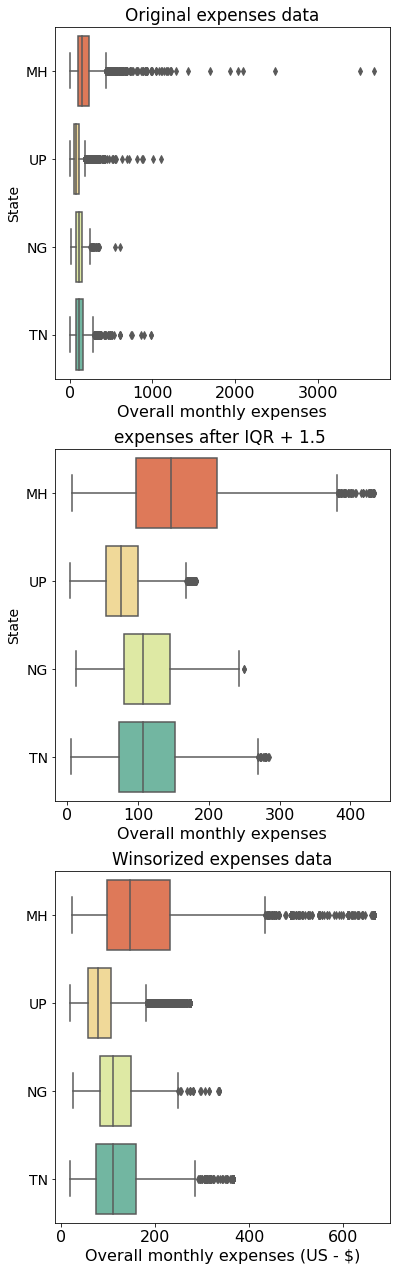

In [19]:
data_frames = [Original_exp, IQR_exp, Winsorization_exp]



# Set the default font size
mpl.rcParams['font.size'] = 14

Original_exp.name = 'Original expenses data'
IQR_exp.name = 'expenses after IQR + 1.5 '
Winsorization_exp.name = 'Winsorized expenses data'

fig, axes = plt.subplots(3, 1, figsize=(6, 22),sharey=True)



for i, df in enumerate(data_frames):
    sns.boxplot(
        data=df,
        x="Overall monthly expenses", y='State',
        orient="h", palette='Spectral', ax=axes[i]
    )
    
    axes[i].set_title(f"{df.name}")
    axes[i].xaxis.set_major_formatter('{x:.0f}')
    axes[i].xaxis.label.set_fontsize(16)
    axes[i].tick_params(axis='x', labelsize=16)

axes[i].set(xlabel="Overall monthly expenses (US - $)", ylabel="")
plt.savefig('Outliers treated expenses data.png', dpi=300)
plt.show()


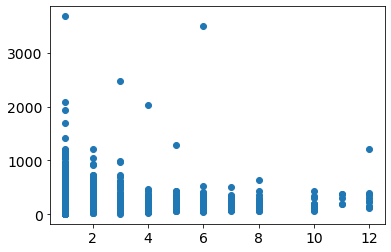

In [47]:
df_MHR_HH3=df_MHR_HH3[df_MHR_HH3['Land Own']<98]
plt.scatter(x=df_MHR_HH3['Land Own'], y=df_MHR_HH3['Overall monthly expenses'])


In [34]:
MH = Original_exp[Original_exp['State']=='MH']
UP = Original_exp[Original_exp['State']=='UP']
NG = Original_exp[Original_exp['State']=='NG']
TN = Original_exp[Original_exp['State']=='TN']

MHIQR = IQR_exp[IQR_exp['State']=='MH']
UPIQR = IQR_exp[IQR_exp['State']=='UP']
NGIQR = IQR_exp[IQR_exp['State']=='NG']
TNIQR = IQR_exp[IQR_exp['State']=='TN']

MHWins = Winsorization_exp[Winsorization_exp['State']=='MH']
UPWins = Winsorization_exp[Winsorization_exp['State']=='UP']
NGWins = Winsorization_exp[Winsorization_exp['State']=='NG']
TNWins = Winsorization_exp[Winsorization_exp['State']=='TN']

In [41]:
print(f"MH {MH.describe()}")
print(f"UP {UP.describe()}")
print(f"NG {NG.describe()}")
print(f"TN {TN.describe()}")
print(f"MH IQR {MHIQR.describe()}")
print(f"UP IQR {UPIQR.describe()}")
print(f"NG IQR {NGIQR.describe()}")
print(f"TN IQR {TNIQR.describe()}")
print(f"MH Wins {MHWins.describe()}")
print(f"UP Wins {UPWins.describe()}")
print(f"NG Wins {NGWins.describe()}")
print(f"TN Wins {TNWins.describe()}")

MH        Overall monthly expenses  index_range
count               6245.000000  6245.000000
mean                 181.521626  3122.000000
std                  152.720851  1802.920547
min                    6.111722     0.000000
25%                   97.787557  1561.000000
50%                  146.681335  3122.000000
75%                  232.245447  4683.000000
max                 3681.799291  6244.000000
UP        Overall monthly expenses  index_range
count              11153.000000  11153.00000
mean                  88.399514  11821.00000
std                   53.182758   3219.73811
min                    3.667033   6245.00000
25%                   56.105611   9033.00000
50%                   77.618873  11821.00000
75%                  106.343968  14609.00000
max                 1102.958074  17397.00000
NG        Overall monthly expenses   index_range
count                672.000000    672.000000
mean                 120.591065  17733.500000
std                   61.973932    194.1339

In [39]:
MHH = Original[Original['State']=='MH']
UPH = Original[Original['State']=='UP']
NGH = Original[Original['State']=='NG']
TNH = Original[Original['State']=='TN']

MHHIQR = IQR[IQR['State']=='MH']
UPHIQR = IQR[IQR['State']=='UP']
NGHIQR = IQR[IQR['State']=='NG']
TNHIQR = IQR[IQR['State']=='TN']

MHHWins = Winsorization[Winsorization['State']=='MH']
UPHWins = Winsorization[Winsorization['State']=='UP']
NGHWins = Winsorization[Winsorization['State']=='NG']
TNHWins = Winsorization[Winsorization['State']=='TN']

In [42]:
print(f"MH {MHH.describe()}")
print(f"UP {UPH.describe()}")
print(f"NG {NGH.describe()}")
print(f"TN {TNH.describe()}")
print(f"MH IQR {MHHIQR.describe()}")
print(f"UP IQR{UPHIQR.describe()}")
print(f"NG IQR{NGHIQR.describe()}")
print(f"TN IQR{TNHIQR.describe()}")
print(f"MH Wins{MHHWins.describe()}")
print(f"UP Wins{UPHWins.describe()}")
print(f"NG Wins {NGHWins.describe()}")
print(f"TN Wins {TNHWins.describe()}")

MH            HH Size  index_range
count  6245.000000  6245.000000
mean      3.509688  3122.000000
std       1.652976  1802.920547
min       1.000000     0.000000
25%       2.000000  1561.000000
50%       4.000000  3122.000000
75%       4.000000  4683.000000
max      18.000000  6244.000000
UP             HH Size  index_range
count  11153.000000  11153.00000
mean       4.378822  11821.00000
std        1.943205   3219.73811
min        1.000000   6245.00000
25%        3.000000   9033.00000
50%        4.000000  11821.00000
75%        5.000000  14609.00000
max       21.000000  17397.00000
NG           HH Size   index_range
count  672.000000    672.000000
mean     3.324405  17733.500000
std      1.400064    194.133974
min      1.000000  17398.000000
25%      2.000000  17565.750000
50%      3.000000  17733.500000
75%      4.000000  17901.250000
max      9.000000  18069.000000
TN            HH Size   index_range
count  4159.000000   4159.000000
mean      2.955759  20149.000000
std       1.3682

# 